# Tracking of particles in a microfluidic device using the library Trackpy

### By J.N. Hayek

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')


import numpy as np
import pandas as pd
from pandas import DataFrame, Series 

import pims
import trackpy as tp
import trackpy.predict


In [2]:
from platform import python_version

print(python_version())

3.7.11


In [74]:
@pims.pipeline
def gray(image):
    return image[10:-11,:, 1]  # Take just the green channel

def trshow(tr, first_style='bo', last_style='gs', style='b.'):
    frames = list(tr.groupby('frame'))
    nframes = len(frames)
    for i, (fnum, pts) in enumerate(frames):
        if i == 0:
            sty = first_style
        elif i == nframes - 1:
            sty = last_style
        else:
            sty = style
        plt.plot(pts.x, pts.y, sty)
    tp.plot_traj(tr, colorby='frame', ax=plt.gca())
    plt.axis('equal'); plt.ylim(ymin=-1.0, ymax=3.5)
    plt.xlabel('x')
    plt.ylabel('y')
    

In [75]:
path = r'../'
  
VideoName="Input/mps_in_channel.mp4"

frames = gray(pims.open(path+VideoName))

In [76]:
len(frames)

242

In [77]:
f = tp.locate(frames[0], 11, invert=True)

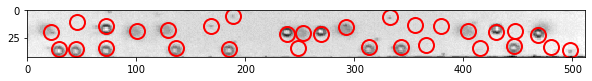

In [78]:
tp.annotate(f, frames[0]);

(array([6., 3., 1., 2., 0., 0., 0., 0., 5., 0., 1., 2., 3., 0., 1., 1., 3.,
        1., 1., 1.]),
 array([ 28.69044304,  72.7169631 , 116.74348316, 160.77000322,
        204.79652329, 248.82304335, 292.84956341, 336.87608347,
        380.90260354, 424.9291236 , 468.95564366, 512.98216372,
        557.00868379, 601.03520385, 645.06172391, 689.08824397,
        733.11476404, 777.1412841 , 821.16780416, 865.19432422,
        909.22084429]),
 <BarContainer object of 20 artists>)

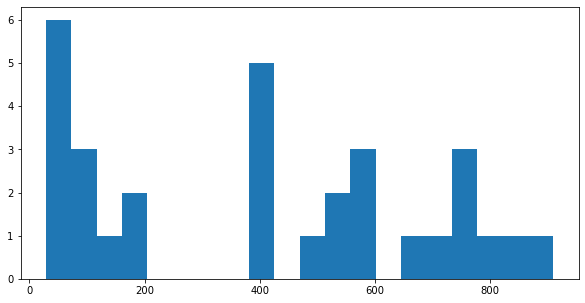

In [79]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

(array([3., 1., 1., 2., 0., 0., 1., 4., 2., 1., 1., 2., 2., 0., 2., 0., 0.,
        2., 0., 3.]),
 array([ 45.50273189,  91.15354959, 136.80436729, 182.45518498,
        228.10600268, 273.75682038, 319.40763808, 365.05845578,
        410.70927348, 456.36009118, 502.01090888, 547.66172658,
        593.31254428, 638.96336198, 684.61417968, 730.26499738,
        775.91581508, 821.56663278, 867.21745048, 912.86826818,
        958.51908588]),
 <BarContainer object of 20 artists>)

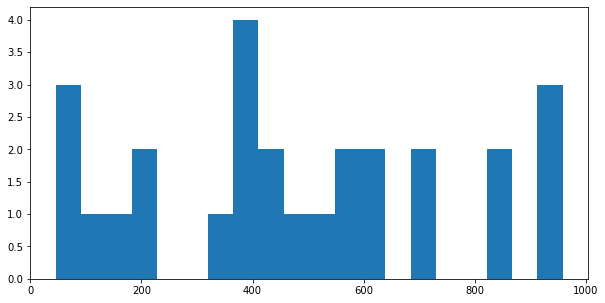

In [80]:
fE= tp.locate(frames[q], 11, invert=True, minmass=2.3)

fig, ax = plt.subplots()
ax.hist(fE['mass'], bins=20)

Frame([[129, 129, 130, ..., 134, 133, 134],
       [130, 129, 133, ..., 133, 134, 133],
       [129, 129, 129, ..., 136, 136, 136],
       ...,
       [133, 134, 130, ..., 127, 130, 131],
       [134, 133, 132, ..., 117, 122, 122],
       [130, 131, 130, ...,  54,  70,  70]], dtype=uint8)
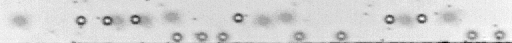

In [170]:
frames[q][:,:]

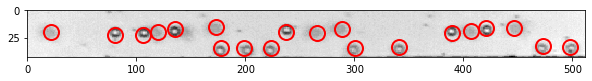

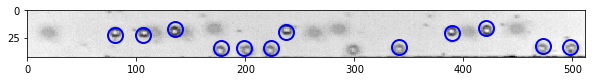

In [179]:
q = 2
fE= tp.locate(frames[q], 11, invert=True, maxsize=5,minmass=200)
tp.annotate(fE, frames[q]);
####################
fE= tp.locate(frames[q], 11, invert=True, minmass=500)
tp.annotate(fE, frames[q],color="b");
##############

/home/nico/miniconda3/envs/Tracking/lib/python3.7/site-packages/pims/pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)


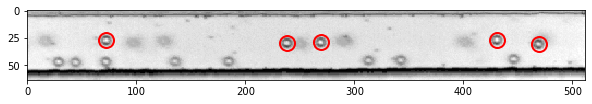

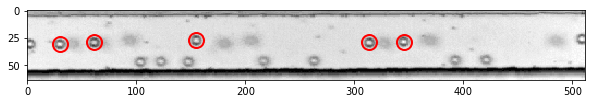

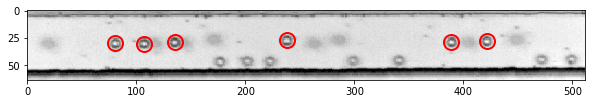

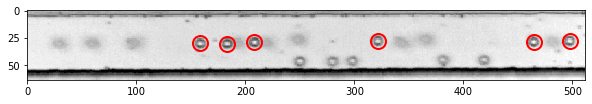

In [24]:


i=0

f0 = tp.locate(frames[i+0], 11, invert=False, maxsize=2)
f1 = tp.locate(frames[i+1], 11, invert=False, maxsize=2)
f2 = tp.locate(frames[i+2], 11, invert=False, maxsize=2)
f3 = tp.locate(frames[i+3], 11, invert=False, maxsize=2)

tp.annotate(f0, frames[i+0]);
tp.annotate(f1, frames[i+1]);
tp.annotate(f2, frames[i+2]);
tp.annotate(f3, frames[i+3]);

Drawing multicolor lines takes awhile. Come back in a minute.


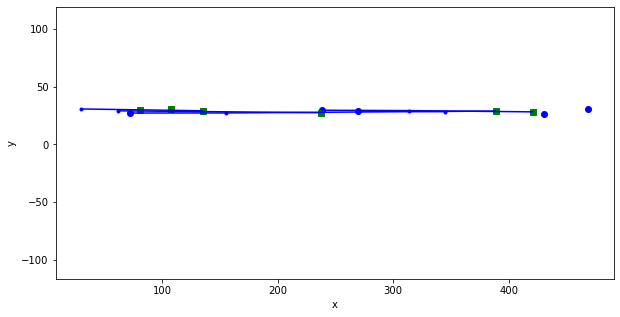

In [26]:
##### Model
Lista = [f0,f1,f2]
@trackpy.predict.predictor
def predict(t1, particle):
    velocity = np.array((150, 0))
    return particle.pos + velocity * (t1 - particle.t)

tr = pd.concat(tp.link_df_iter(Lista, 100, predictor=predict))
trshow(tr)

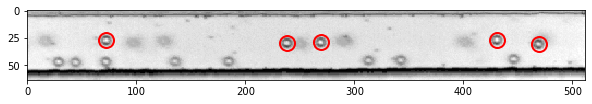

In [11]:
tp.annotate(tr[tr["frame"]==0], frames[0]);

In [12]:
DataCollection = pd.concat(tp.link_df_iter(Lista, 100, predictor=predict))
DataCollection

Frame 2: 6 trajectories present.


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
21,27.122829,72.065757,124.062752,1.163975,0.482406,23.396449,6788.0,-0.135493,0,0
22,26.695201,430.573281,118.675411,1.187920,0.459594,22.626829,6825.0,-0.141093,0,1
23,28.909375,269.039583,147.767049,1.151539,0.391875,25.705310,6586.0,-0.111361,0,2
24,29.542802,237.874514,158.233882,1.311799,0.352766,23.550373,6380.0,-0.094243,0,3
25,30.517625,468.983302,82.965041,1.057704,0.411630,17.547337,6399.0,-0.095598,0,4
20,27.187717,154.838934,130.877397,1.174764,0.400327,22.444791,6442.0,-0.091332,1,0
21,28.391354,345.201365,133.303861,1.204372,0.430738,23.506369,6697.0,-0.114021,1,2
22,29.035881,61.344774,97.210211,1.128278,0.460433,18.956749,5999.0,-0.067870,1,5
23,29.243697,313.526261,144.374603,1.273106,0.424193,22.748099,6465.0,-0.093001,1,3
24,30.657692,29.515385,157.720154,1.281526,0.442776,25.022909,6750.0,-0.120228,1,6


In [13]:
ListData = []
for i in range(48):
    f0 = tp.locate(frames[i], 11, invert=False, maxsize=2)
    ListData.append(f0)

    DataCollection = pd.concat(tp.link_df_iter(ListData, 100, predictor=predict))

Frame 47: 6 trajectories present.


In [14]:
DataCollection.columns


Index(['y', 'x', 'mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep', 'frame',
       'particle'],
      dtype='object')